In [1]:
# SETUP LIBRARY DULU
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

2025-12-02 04:04:02.366597: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-02 04:04:02.402493: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-02 04:04:02.402624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-02 04:04:02.403613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-02 04:04:02.409662: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# PERSIAPAN DATA DAN SCALING MODEL PERTAMA

data = pd.read_csv("/work/Final_data.csv")
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [3]:
data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [5]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


In [6]:
# CLEANING DATA
median_non_neg = data[data['Physical exercise'] >= 0]['Physical exercise'].median()
data['Physical exercise'] = data['Physical exercise'].apply(lambda x: median_non_neg if x < 0 else x)

data['Physical exercise'].describe()

count    20000.000000
mean         0.464266
std          0.981135
min         -0.000000
25%          0.010000
50%          0.020000
75%          0.040000
max          4.050000
Name: Physical exercise, dtype: float64

In [7]:
# ENCODING GENDER MENJADI BINER
data['Gender'] = data['Gender'].map({
    'Male' : 1,
    'Female' : 0
})

In [8]:
# MENDEFINISIKAN FITUR WAJIB (VARIABEL NUMERIK + VARIABEL KATEGORIKAL)
common_features = [
    'Age',
    'Gender',
    'Weight (kg)',
    'Height (m)',
    'BMI',
    'Workout_Frequency (days/week)',
    'Session_Duration (hours)',
    'Workout_Type',
    'Daily meals frequency',
    'diet_type',
    'Calories',
    'Physical exercise',
    'Experience_Level'
]

available_features = [f for f in common_features if f in data.columns]
X_common = data[available_features]
y_calories = data['Calories_Burned']

print("Fitur yang ada pada model pertama: \n",available_features)
print("\n✅ | Fitur utama yang digunakan totalnya ", len(available_features), available_features)

Fitur yang ada pada model pertama: 
 ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 'Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Workout_Type', 'Daily meals frequency', 'diet_type', 'Calories', 'Physical exercise', 'Experience_Level']

✅ | Fitur utama yang digunakan totalnya  13 ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 'Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Workout_Type', 'Daily meals frequency', 'diet_type', 'Calories', 'Physical exercise', 'Experience_Level']


In [9]:
# ENCODING KOLOM KATEGORI
onehot_cols_common = ['Workout_Type', 'diet_type']

# SALIN DATA UMUM
df_common_encoded = X_common.copy()

# ONE-HOT ENCODING
if onehot_cols_common :
  ohe_common = OneHotEncoder(sparse_output=False, drop='first')
  ohe_result_common = ohe_common.fit_transform(df_common_encoded[onehot_cols_common])
  ohe_df_common = pd.DataFrame(ohe_result_common, columns=ohe_common.get_feature_names_out(onehot_cols_common))
  df_common_encoded = df_common_encoded.drop(columns = onehot_cols_common).reset_index(drop = True).join(ohe_df_common.reset_index(drop = True))

In [10]:
# STANDARD SCALLER
numeric_cols_common = df_common_encoded.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols_common = df_common_encoded.columns.difference(numeric_cols_common)

scaler_common = StandardScaler()
scaled_numeric_common = scaler_common.fit_transform(df_common_encoded[numeric_cols_common])
scaled_df_common = pd.DataFrame(scaled_numeric_common, columns=numeric_cols_common)
X_common_processed = df_common_encoded[categorical_cols_common].join(scaled_df_common)

print("Data umum siap untuk model kalori.")
print("X_common_processed shape:", X_common_processed.shape)

Data umum siap untuk model kalori.
X_common_processed shape: (20000, 19)


In [11]:
# FINAL FEATURES
X_common_processed = df_common_encoded[categorical_cols_common].reset_index(drop = True).join(scaled_df_common.reset_index(drop = True))
print(f"✅ | Data diproses! Total fitur akhir {X_common_processed.shape[1]}")

✅ | Data diproses! Total fitur akhir 19


In [12]:
# MEMBAGI DATA TRAIN DENGAN DATA VALIDASI DAN DATA TEST
X_cal_train, X_cal_temp, y_cal_train, y_cal_temp = train_test_split(
    X_common_processed, y_calories,
    test_size=0.3,
    random_state=42
)

X_cal_val, X_cal_test, y_cal_val, y_cal_test = train_test_split(
    X_cal_temp, y_cal_temp,
    test_size=0.5,
    random_state=42
)

print("Split data untuk model kalori:")
print(f"Train: {X_cal_train.shape[0]}")
print(f"Validation: {X_cal_val.shape[0]}")
print(f"Test: {X_cal_test.shape[0]}")
print("🙏 | Split data kalori (train/ validation/ test) selesai")

Split data untuk model kalori:
Train: 14000
Validation: 3000
Test: 3000
🙏 | Split data kalori (train/ validation/ test) selesai


In [13]:
# MENDEFINISIKAN EARLY STOPPING
early_stopping = EarlyStopping(
    monitor = 'val_mae',
    patience = 15,
    restore_best_weights = True
)

In [14]:
# MEMBANGUN ARSITEKTUR MODEL PERTAMA
model_pertama = Sequential([
    Dense(64, activation = 'relu', input_shape = (X_cal_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(1) # Output -> Calories_Burned
])

In [15]:
# COMPILE MODEL DENGAN LEARNING RATE = 0.001
model_pertama.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'mse',
    metrics = ['mae']
)

model_pertama.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# TRAINING MODEL PERTAMA
print("\nTraining model pertama...")
history_cal = model_pertama.fit(
    X_cal_train, y_cal_train,
    validation_data = (X_cal_val, y_cal_val),
    epochs = 100,
    batch_size = 32,
    verbose = 2
)


Training model pertama...
Epoch 1/100
438/438 - 1s - loss: 1252941.3750 - mae: 995.8677 - val_loss: 163012.5625 - val_mae: 342.7285 - 1s/epoch - 3ms/step
Epoch 2/100
438/438 - 1s - loss: 106844.4141 - mae: 265.1239 - val_loss: 36758.2930 - val_mae: 155.1543 - 529ms/epoch - 1ms/step
Epoch 3/100
438/438 - 1s - loss: 67914.7188 - mae: 207.1461 - val_loss: 16811.2012 - val_mae: 105.4054 - 562ms/epoch - 1ms/step
Epoch 4/100
438/438 - 1s - loss: 56600.2656 - mae: 186.3922 - val_loss: 10533.6494 - val_mae: 83.4770 - 552ms/epoch - 1ms/step
Epoch 5/100
438/438 - 1s - loss: 50894.7930 - mae: 174.8473 - val_loss: 7195.5913 - val_mae: 68.6588 - 621ms/epoch - 1ms/step
Epoch 6/100
438/438 - 1s - loss: 47509.1445 - mae: 168.5735 - val_loss: 5211.2402 - val_mae: 57.9155 - 585ms/epoch - 1ms/step
Epoch 7/100
438/438 - 1s - loss: 48008.0586 - mae: 168.3969 - val_loss: 4483.5586 - val_mae: 53.3970 - 543ms/epoch - 1ms/step
Epoch 8/100
438/438 - 1s - loss: 44864.2969 - mae: 162.8547 - val_loss: 4346.7324 -

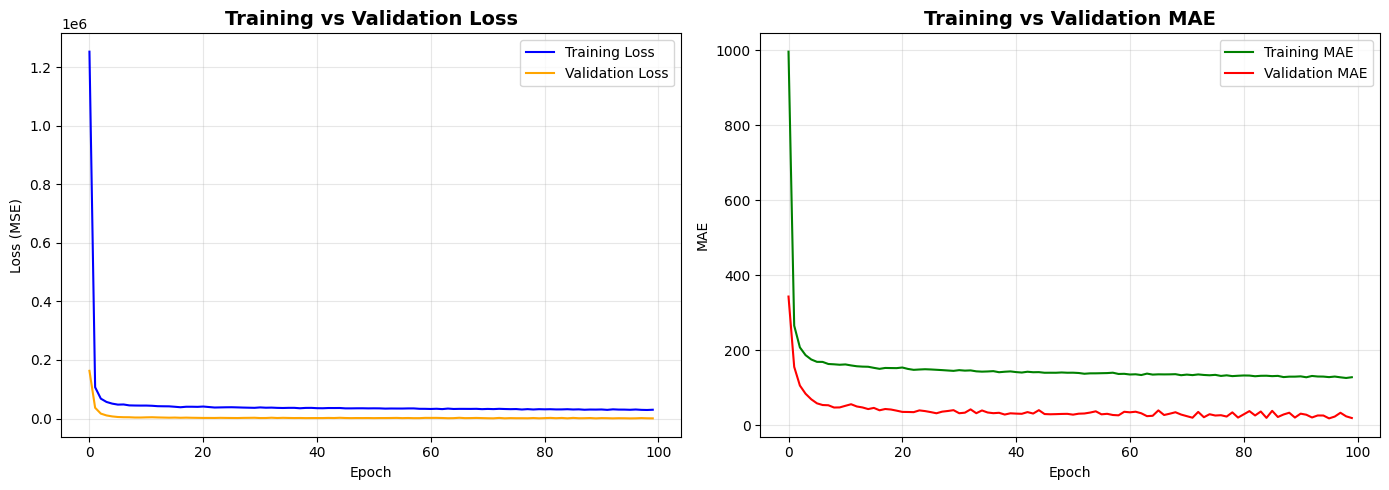

In [17]:
# MENAMPILKAN VISUALISASI LOSS
loss = history_cal.history['loss']
val_loss = history_cal.history['val_loss']
mae = history_cal.history['mae']
val_mae = history_cal.history['val_mae']

# TAMPILAN PLOT LOSS
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color= 'blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# TAMPILAN PLOT MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.plot(val_mae, label='Validation MAE', color='red')
plt.title('Training vs Validation MAE', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# EVALUASI MODEL DENGAN DATA TEST
y_cal_pred = model_pertama.predict(X_cal_test)
mae_cal = mean_absolute_error(y_cal_test, y_cal_pred)
mse_cal = mean_squared_error(y_cal_test, y_cal_pred)
r2_cal = r2_score(y_cal_test, y_cal_pred)

print("\n ==== EVALUASI MODEL PERTAMA ====")
print(f"Mean Absolute Error (MAE): {mae_cal:.2f}")
print(f"Mean Squared Error (MSE): {mse_cal:.2f}")
print(f"R² Score: {r2_cal:.4f}")

94/94 [==============================] - 0s 743us/step

 ==== EVALUASI MODEL PERTAMA ====
Mean Absolute Error (MAE): 18.86
Mean Squared Error (MSE): 556.91
R² Score: 0.9978


In [19]:
# TAMBAH LAYER
model_pertama_tuned = Sequential([
    Dense(128, input_shape=(X_cal_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(32),
    LeakyReLU(alpha=0.1),

    Dense(1)
])

model_pertama_tuned.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'mse',
    metrics = ['mae']
)

model_pertama_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2560      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)               

In [20]:
# HENTI PAKSA
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25, # toleransi 25 epoch, terus stop paksa!
    restore_best_weights=True, # ambil epoch yang terbaik!
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # nek macet, ngurangi learning-rate sekitar 20%
    patience=10, # nungguni 10 epoch baru ngurangi
    min_lr=0.00001, # batas bawah learning-rate
    verbose=1
)

In [21]:
# EVALUASI MODEL PERTAMA SETELAH DITUNING
history_cal_tuned = model_pertama_tuned.fit(
    X_cal_train, y_cal_train,
    validation_data = (X_cal_val, y_cal_val),
    epochs = 500,
    batch_size = 32,
    callbacks=[early_stopping, reduce_lr],
    verbose = 2
)

y_cal_pred_tuned = model_pertama_tuned.predict(X_cal_test)
mae_cal_tuned = mean_absolute_error(y_cal_test, y_cal_pred_tuned)
mse_cal_tuned = mean_squared_error(y_cal_test, y_cal_pred_tuned)
r2_cal_tuned = r2_score(y_cal_test, y_cal_pred_tuned)

print("\n==== EVALUASI HASIL MODEL PERTAMA SETELAH DITUNING ====")
print(f"Mean Absolute Error (MAE): {mae_cal_tuned:.2f}")
print(f"Mean Squared Error (MSE): {mse_cal_tuned:.2f}")
print(f"R2 Score: {r2_cal_tuned:.4f}")

Epoch 1/500
438/438 - 1s - loss: 480321.0000 - mae: 455.9915 - val_loss: 11866.8691 - val_mae: 87.5826 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 2/500
438/438 - 1s - loss: 25381.1445 - mae: 124.4593 - val_loss: 5038.8623 - val_mae: 56.2190 - lr: 0.0010 - 574ms/epoch - 1ms/step
Epoch 3/500
438/438 - 1s - loss: 21612.9375 - mae: 114.2700 - val_loss: 3995.1616 - val_mae: 50.9097 - lr: 0.0010 - 566ms/epoch - 1ms/step
Epoch 4/500
438/438 - 1s - loss: 19152.5547 - mae: 106.6555 - val_loss: 2490.6731 - val_mae: 38.5484 - lr: 0.0010 - 549ms/epoch - 1ms/step
Epoch 5/500
438/438 - 1s - loss: 18628.7988 - mae: 105.0933 - val_loss: 2583.0044 - val_mae: 39.6841 - lr: 0.0010 - 573ms/epoch - 1ms/step
Epoch 6/500
438/438 - 1s - loss: 17248.0762 - mae: 100.5461 - val_loss: 1737.2045 - val_mae: 31.9420 - lr: 0.0010 - 559ms/epoch - 1ms/step
Epoch 7/500
438/438 - 1s - loss: 16773.1016 - mae: 98.7904 - val_loss: 2188.5823 - val_mae: 37.0755 - lr: 0.0010 - 551ms/epoch - 1ms/step
Epoch 8/500
438/438 - 1s - lo

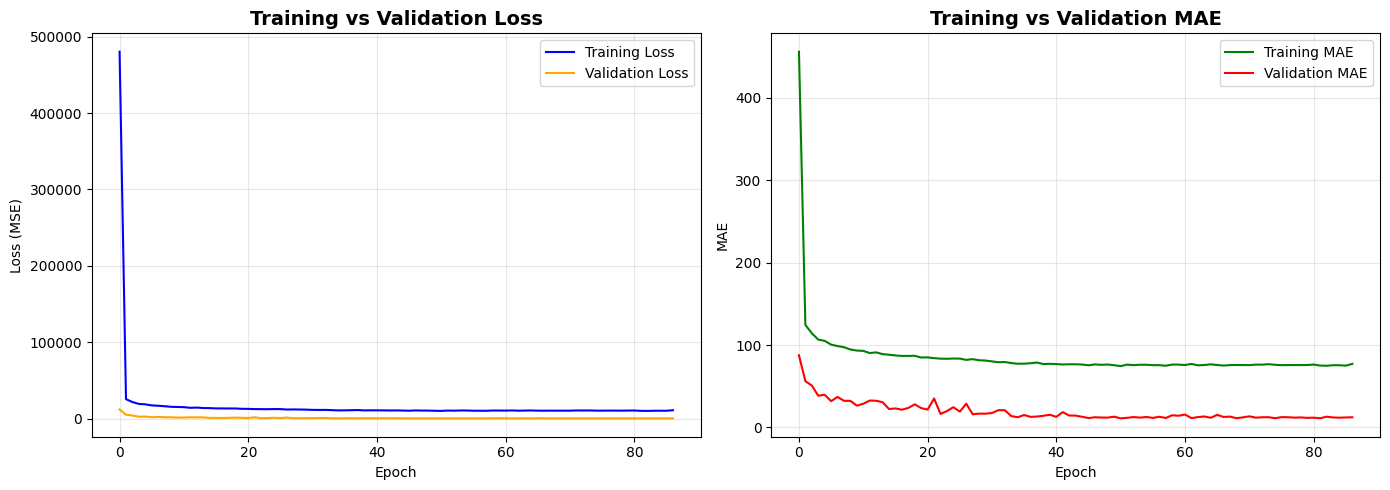

In [22]:
loss_tuned = history_cal_tuned.history['loss']
val_loss_tuned = history_cal_tuned.history['val_loss']
mae_tuned = history_cal_tuned.history['mae']
val_mae_tuned = history_cal_tuned.history['val_mae']

# PLOT LOSS
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_tuned, label='Training Loss', color='blue')
plt.plot(val_loss_tuned, label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# PLOT MAE
plt.subplot(1, 2, 2)
plt.plot(mae_tuned, label='Training MAE', color='green')
plt.plot(val_mae_tuned, label='Validation MAE', color='red')
plt.title('Training vs Validation MAE', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# CEK DULU
if 'Name of Exercise' in data.columns:
    print("✅ | Kolom 'Name of Exercise' terdeteksi!")
    print(f"Jumlah exercise unik: {data['Name of Exercise'].nunique()}")
    print("\nContoh exercise:")
    print(data['Name of Exercise'].unique()[:10])
else:
    print("❌ | Kolom 'Name of Exercise' tidak terdeteksi!")
    print("Berikut kolom yang tersedia: ", data.columns.tolist())

✅ | Kolom 'Name of Exercise' terdeteksi!
Jumlah exercise unik: 55

Contoh exercise:
['Decline Push-ups' 'Bear Crawls' 'Dips' 'Mountain Climbers' 'Bicep Curls'
 'Leg Press' 'Thrusters' 'Turkish Get-ups' 'Glute Bridges' 'Step-ups']


In [24]:
# HITUNG FREKUENSI TIAP EXERCISE
exercise_counts = data['Name of Exercise'].value_counts()

# AMBIL YANG NONGOL MINIMAL 5 KALI!
min_freq = 5
valid_exercises = exercise_counts[exercise_counts >= min_freq].index
print(f"✅ {len(valid_exercises)} exercise dipilih (muncul ≥ {min_freq} kali)")

# FILTER DATA
data_filtered = data[data['Name of Exercise'].isin(valid_exercises)].copy()
print(f"Data setelah filter: {data_filtered.shape[0]} baris")

✅ 55 exercise dipilih (muncul ≥ 5 kali)
Data setelah filter: 20000 baris


In [25]:
# TARGET JENIS EXERCISE (LABEL ENCODING UNTUK KLASIFIKASI)
from sklearn.preprocessing import LabelEncoder

le_exercise = LabelEncoder()
y_workout = le_exercise.fit_transform(data_filtered['Name of Exercise'])
n_workout_classes = len(le_exercise.classes_)

print(f"\n✅ | Jumlah kelas exercise: {n_workout_classes}")
print("Contoh kelas: ", le_exercise.classes_[:10])

# TARGET DURASI (DALAM MENIT)
y_duration = data_filtered['Session_Duration (hours)'] * 60 # Diubah dari jam --> menit

# TARGET FREKUENSI
y_frequency = data_filtered['Workout_Frequency (days/week)']

# TARGET INTENSITAS (BERDASARKAN EXPERIENCE LEVEL)
experience_map = {'Beginner': 0, 'Intermediate': 1, 'Advanced': 2}
y_intensity = data_filtered['Experience_Level'].map(experience_map).fillna(1)  # default Intermediate
y_intensity = y_intensity.astype(int)

# VALIDASI: pastikan semua nilai 0, 1, 2
invalid_mask = ~y_intensity.isin([0, 1, 2])
if invalid_mask.any():
    print(f"⚠️ Ada {invalid_mask.sum()} baris dengan Experience_Level tidak valid. Di-set ke Intermediate.")
    y_intensity[invalid_mask] = 1

# KONVERSI KE ONE-HOT
from tensorflow.keras.utils import to_categorical
y_intensity_oh = to_categorical(y_intensity, num_classes=3)

print("✅ Target intensitas siap! Shape:", y_intensity_oh.shape)


✅ | Jumlah kelas exercise: 55
Contoh kelas:  ['Bear Crawls' 'Bench Press' 'Bicep Curls' 'Bicycle Crunches' 'Bird Dogs'
 'Box Jumps' 'Bulgarian Split Squats' 'Burpees' 'Calf Raises' 'Dead Bugs']
✅ Target intensitas siap! Shape: (20000, 3)


In [26]:
# AMBIL FITUR YANG SAMA DARI MODEL PERTAMA
common_features = [
    'Age',
    'Gender',
    'Weight (kg)',
    'Height (m)',
    'BMI',
    'Workout_Frequency (days/week)',
    'Session_Duration (hours)',
    'Workout_Type',
    'Daily meals frequency',
    'diet_type',
    'Calories',
    'Physical exercise',
    'Experience_Level'
]

available_features = [f for f in common_features if f in data_filtered.columns]
X_base = data_filtered[available_features].copy()

In [27]:
# ENCODE GENDER
if X_base['Gender'].dtype == 'object':
    X_base['Gender'] = X_base['Gender'].map({'Male': 1, 'Female': 0})

In [28]:
# ONE-HOT ENCODE KATEGORIKAL (Workout_Type dan diet_type)
from sklearn.preprocessing import OneHotEncoder

X_base = data_filtered[available_features].copy()

onehot_cols = ['Workout_Type', 'diet_type', 'Experience_Level']
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe_result = ohe.fit_transform(X_base[onehot_cols])
ohe_df = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(onehot_cols))

X_encoded = X_base.drop(columns=onehot_cols).reset_index(drop=True).join(ohe_df.reset_index(drop=True))

In [29]:
# SCALING LANGSUNG UNTUK NUMERIK
numeric_cols = X_encoded.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X_encoded.columns.difference(numeric_cols)

scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(X_encoded[numeric_cols])
scaled_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

X_processed = (
    X_encoded[categorical_cols].reset_index(drop=True)
    .join(scaled_df.reset_index(drop=True))
)

# TAMBAHKAN calories_burned_actual
X_model2 = X_processed.copy()
X_model2['calories_burned_actual'] = data_filtered['Calories_Burned'].values

print("✅ | Preprocessing selesai. Experience_Level tidak di-scale (seharusnya)!")
print(f"✅ Input Model Kedua siap! Shape: {X_model2.shape}")

✅ | Preprocessing selesai. Experience_Level tidak di-scale (seharusnya)!
✅ Input Model Kedua siap! Shape: (20000, 50)


In [30]:
# ARSITEKTUR MULTI OUTPUT DNN
data_filtered = data_filtered.reset_index(drop=True)

data_filtered['workout_type_label'] = y_workout
data_filtered['duration'] = y_duration.values
data_filtered['frequency'] = y_frequency.values
data_filtered['intensity'] = list(y_intensity_oh)

train_val_index, test_index = train_test_split(
    data_filtered.index,
    test_size=0.15,
    random_state=42,
    stratify=data_filtered['workout_type_label']
)

train_index, val_index = train_test_split(
    train_val_index,
    test_size=0.1765,
    random_state=42,
    stratify=data_filtered.loc[train_val_index, 'workout_type_label']
)

X_train = X_model2.loc[train_index].values
X_val = X_model2.loc[val_index].values
X_test = X_model2.loc[test_index].values

y_train_workout = y_workout[train_index]
y_val_workout = y_workout[val_index]
y_test_workout = y_workout[test_index]

y_train_duration = y_duration.iloc[train_index].values
y_val_duration = y_duration.iloc[val_index].values
y_test_duration = y_duration.iloc[test_index].values

y_train_frequency = y_frequency.iloc[train_index].values
y_val_frequency = y_frequency.iloc[val_index].values
y_test_frequency = y_frequency.iloc[test_index].values

y_train_intensity = y_intensity_oh[train_index]
y_val_intensity = y_intensity_oh[val_index]
y_test_intensity = y_intensity_oh[test_index]

y_train = {
    'workout_type': y_train_workout,
    'duration': y_train_duration,
    'frequency': y_train_frequency,
    'intensity': y_train_intensity
}

y_val = {
    'workout_type': y_val_workout,
    'duration': y_val_duration,
    'frequency': y_val_frequency,
    'intensity': y_val_intensity
}

y_test = {
    'workout_type': y_test_workout,
    'duration': y_test_duration,
    'frequency': y_test_frequency,
    'intensity': y_test_intensity
}

print("✅ | Bagi data selesai:")
print(f"Train: {X_train.shape[0]}")
print(f"Val: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")

✅ | Bagi data selesai:
Train: 13999
Val: 3001
Test: 3000


In [31]:
# MERANCANG MODEL MULTI-OUTPUT
n_features = X_train.shape[1]
n_workout_classes = len(np.unique(y_workout))

# INPUT
input_layer = Input(shape=(n_features,), name='input_features')

# SHARED LAYERS
x = Dense(128, name='shared_1')(input_layer)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, name='shared_2')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.2)(x)

x = Dense(32, name='shared_3')(x)
x = LeakyReLU(alpha=0.1)(x)

In [32]:
# ==== HEAD 1: Jenis Latihan (Klasifikasi) ====
workout_head = Dense(32, activation='relu', name='workout_head')(x)
workout_output = Dense(n_workout_classes, activation='softmax', name='workout_type')(workout_head)

# ==== HEAD 2: Durasi (Regresi) ====
duration_head = Dense(16, activation='relu', name='duration_head')(x)
duration_output = Dense(1, activation='relu', name='duration')(duration_head)

# ==== HEAD 3: Frekuensi (Regresi) ====
frequency_head = Dense(16, activation='relu', name='frequency_head')(x)
frequency_output = Dense(1, activation='relu', name='frequency')(frequency_head)

# ==== HEAD 4: Intensitas (Klasifikasi) ====
intensity_head = Dense(16, activation='relu', name='intensity_head')(x)
intensity_output = Dense(3, activation='softmax', name='intensity')(intensity_head)

# Gabung jadi model
model_kedua = Model(
    inputs=input_layer,
    outputs=[workout_output, duration_output, frequency_output, intensity_output],
    name='Personal_Exercise_Recommender'
)

# Tampilkan ringkasan
model_kedua.summary()

Model: "Personal_Exercise_Recommender"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_features (InputLayer  [(None, 50)]                 0         []                            
 )                                                                                                
                                                                                                  
 shared_1 (Dense)            (None, 128)                  6528      ['input_features[0][0]']      
                                                                                                  
 leaky_re_lu_3 (LeakyReLU)   (None, 128)                  0         ['shared_1[0][0]']            
                                                                                                  
 batch_normalization (Batch  (None, 128)                  512       ['

In [33]:
# HITUNG CLASS WEIGHTS UNTUK Workout_Type
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train['workout_type']),
    y=y_train['workout_type']
)
class_weight_dict = dict(enumerate(class_weights))

# COMPILE MODEL
model_kedua.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        'workout_type': 'sparse_categorical_crossentropy',
        'duration': 'mse',
        'frequency': 'mse',
        'intensity': 'categorical_crossentropy'
    },
    metrics={
        'workout_type': 'accuracy',
        'duration': 'mae',
        'frequency': 'mae',
        'intensity': 'accuracy'
    },
    loss_weights={
        'workout_type': 2.0,
        'duration': 1.0,
        'frequency': 1.0,
        'intensity': 1.0
    }
)

In [34]:
# CALLBACKS
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=1e-6,
    verbose=1
)

In [35]:
# TRAINING MODEL KEDUA
print("🎉 | Training model kedua ....")
history_model2 = model_kedua.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

🎉 | Training model kedua ....
Epoch 1/300
438/438 - 4s - loss: 1686.1846 - workout_type_loss: 4.2704 - duration_loss: 1674.1118 - frequency_loss: 3.4287 - intensity_loss: 0.1044 - workout_type_accuracy: 0.0184 - duration_mae: 30.9494 - frequency_mae: 1.4112 - intensity_accuracy: 0.9661 - val_loss: 1952.7939 - val_workout_type_loss: 4.0157 - val_duration_loss: 1941.9296 - val_frequency_loss: 2.8323 - val_intensity_loss: 8.3411e-04 - val_workout_type_accuracy: 0.0183 - val_duration_mae: 40.8104 - val_frequency_mae: 1.4733 - val_intensity_accuracy: 1.0000 - lr: 0.0010 - 4s/epoch - 9ms/step
Epoch 2/300
438/438 - 1s - loss: 199.8969 - workout_type_loss: 4.0116 - duration_loss: 191.0327 - frequency_loss: 0.8410 - intensity_loss: 1.4987e-06 - workout_type_accuracy: 0.0185 - duration_mae: 10.5068 - frequency_mae: 0.7368 - intensity_accuracy: 1.0000 - val_loss: 297.8954 - val_workout_type_loss: 4.0069 - val_duration_loss: 289.2681 - val_frequency_loss: 0.6135 - val_intensity_loss: 2.6622e-07 - 

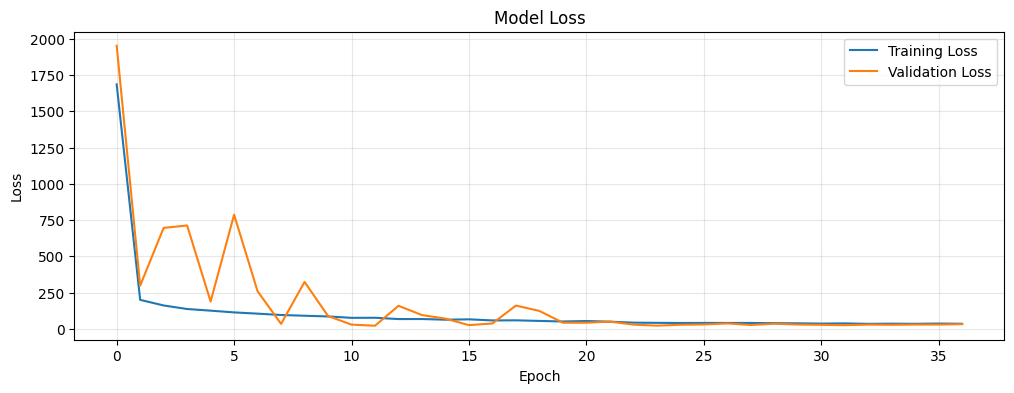

In [36]:
# MEMVISUALISASIKAN PLOT
loss_model2 = history_model2.history['loss']
val_loss_model2 = history_model2.history['val_loss']

plt.figure(figsize=(12, 4))
plt.plot(loss_model2, label='Training Loss')
plt.plot(val_loss_model2, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [37]:
# COBA PREDIKSI SATU SAMPLE DARI DATASET
sample_input = X_train[5:6] # artinya shape(1, n_features)

pred_workout, pred_duration, pred_frequency, pred_intensity = model_kedua.predict(sample_input)

# DECODE JENIS LATIHAN
predicted_class = np.argmax(pred_workout, axis=1)[0]
predicted_exercise = le_exercise.inverse_transform([predicted_class])[0]

print(f"✅ | Rekomendasi Jenis Latihan: {predicted_exercise}")

# DECODE DURASI + FREKUENSI
duration_min = int(round(pred_duration[0][0]))
frequency_week = int(round(pred_frequency[0][0]))

print(f"⏱️ Durasi per sesi: {duration_min} menit")
print(f"📅 Frekuensi per minggu: {frequency_week}x")

# DECODE INTENSITAS
intensity_class = np.argmax(pred_intensity, axis=1)[0]
intensity_labels = ['Rendah', 'Sedang', 'Tinggi']
predicted_intensity = intensity_labels[intensity_class]

print(f"🔥 Intensitas: {predicted_intensity}")

# GABUNG SEMUA JADI REKOMENDASI MANUSIAWI
rekomendasi = {
    "jenis_latihan": predicted_exercise,
    "durasi_menit": duration_min,
    "frekuensi_per_minggu": frequency_week,
    "intensitas": predicted_intensity,

    "note": "rekomendasi ini disesuaikan dengan profil kamu. Mulai dengan perlahan dan dengarkan tubuh kamu!"
}

print("\n😁 REKOMENDASI UNTUK ANDA: ")
for key, value in rekomendasi.items():
    print(f"{key.replace('_', ' ').title()}: {value}")

1/1 [==============================] - 0s 112ms/step
✅ | Rekomendasi Jenis Latihan: Flutter Kicks
⏱️ Durasi per sesi: 37 menit
📅 Frekuensi per minggu: 2x
🔥 Intensitas: Sedang

😁 REKOMENDASI UNTUK ANDA: 
Jenis Latihan: Flutter Kicks
Durasi Menit: 37
Frekuensi Per Minggu: 2
Intensitas: Sedang
Note: rekomendasi ini disesuaikan dengan profil kamu. Mulai dengan perlahan dan dengarkan tubuh kamu!


In [38]:
# HITUNG STATISTIK PER EXERCISE
exercise_stats = data_filtered.groupby('Name of Exercise').agg(
    avg_duration_min=('Session_Duration (hours)', lambda x: (x * 60).mean()),
    median_duration_min=('Session_Duration (hours)', lambda x: (x * 60).median()),
    max_duration_min=('Session_Duration (hours)', lambda x: (x * 60).max()),
    min_experience=('Experience_Level', lambda x: x.mode()[0] if not x.mode().empty else 'Beginner'),
    avg_calories=('Calories_Burned', 'mean'),
    count=('Name of Exercise', 'size')
).reset_index()

In [39]:
# TENTUIN DURASI MAKSIMAL BIAR MANUK AKAL ANJIR!!!
exercise_stats['max_reasonable_duration'] = exercise_stats['median_duration_min'] * 1.5
exercise_stats['max_reasonable_duration'] = exercise_stats['max_reasonable_duration'].clip(upper=30)  # max 30 menit

In [40]:
# TENTUIN KATEGORI LATIHAN
def infer_category(exercise_name):
    name_lower = exercise_name.lower()
    if any(kw in name_lower for kw in ['squat', 'lunge', 'deadlift', 'press']):
        return 'Strength'
    elif any(kw in name_lower for kw in ['run', 'jump', 'climb', 'hiit', 'burpee']):
        return 'Cardio'
    elif any(kw in name_lower for kw in ['push', 'pull', 'curl', 'row']):
        return 'Upper Body'
    elif any(kw in name_lower for kw in ['plank', 'bug', 'bridge', 'cobra']):
        return 'Core'
    else:
        return 'General'
exercise_stats['category'] = exercise_stats['Name of Exercise'].apply(infer_category)

In [41]:
# SIMPAN SEBAGAI DICTIONARY
knowledge_base = {}
for _, row in exercise_stats.iterrows():
    knowledge_base[row['Name of Exercise']] = {
        'category': row['category'],
        'avg_duration_min': round(row['avg_duration_min'], 1),
        'max_duration_min': min(20, round(row['max_reasonable_duration'], 1)),  # batas aman
        'min_experience': row['min_experience'],
        'avg_calories_per_min': round(row['avg_calories'] / row['avg_duration_min'], 1) if row['avg_duration_min'] > 0 else 5
    }

print("✅ | Knowledge Base berhasil dibuat dari dataset!")
print("Contohnya gini: Deadlift")
print(knowledge_base['Deadlift'])

✅ | Knowledge Base berhasil dibuat dari dataset!
Contohnya gini: Deadlift
{'category': 'Strength', 'avg_duration_min': 76.7, 'max_duration_min': 20, 'min_experience': 1.0, 'avg_calories_per_min': 17.0}


In [42]:
# TAMBAHIN KOLOM KATEGORI ke data_filtered
data_filtered['workout_category'] = data_filtered['Name of Exercise'].map(
    lambda x: knowledge_base.get(x, {}).get('category', 'General')
)

# LABEL ENCODE KATEGORI
le_category = LabelEncoder()
y_category = le_category.fit_transform(data_filtered['workout_category'])
n_category = len(le_category.classes_)

In [43]:
# BUAT FUNGSI GENERATE FULL RENCANA WORKOUT
def generate_full_wo_plan(
    predicted_category,
    predicted_duration_total,
    predicted_intensity,
    experience_level,
    knowledge_base
):
    # CARI EXERCISE
    eligible_exercises = [
        name for name, info in knowledge_base.items()
        if info['category'] == predicted_category and (
            (experience_level == 'Beginner' and info['min_experience'] in ['Beginner'])
            or (experience_level == 'Intermediate' and info['min_experience'] in ['Beginner', 'Intermediate'])
            or (experience_level == 'Advanced')
        )
    ]

    # KALAU GAK ADA ECERCISE YANG COCOK, AMBIL SEMUA EXERCISE AJA
    if not eligible_exercises:
        print(f"💀 | Gak ada exercise di kategori '{predicted_category}' untuk {experience_level}. Gunakan semua exercise saja.")
        eligible_exercises = list(knowledge_base.keys())

    # BATASIN MAX 4 dan MIN 1
    n_select = min(4, max(1, len(eligible_exercises)))
    import random
    selected = random.sample(eligible_exercises, min(4, len(eligible_exercises)))

    # BUAT PLAN
    plan = []

    # PEMANASAN
    plan.append({"exercise": "Jumping Jacks", "duration_min": 3, "type": "warmup"})

    core_duration = predicted_duration_total - 6
    per_exercise = max(4, core_duration // len(selected))

    for ex in selected:
        dur = min(per_exercise, knowledge_base[ex]['max_duration_min'])
        plan.append({
            "exercise": ex,
            "duration_min": int(dur),
            "type": "main",
            "calories": int(dur * knowledge_base[ex]['avg_calories_per_min'])
        })
    
    # PENDINGINAN
    plan.append({"exercise": "Deep Breathing / Stretching", "duration_min": 3, "type": "cooldown"})
    
    return plan

In [44]:
print("Kolom di X_encoded yang mengandung 'Experience':")
cols_with_exp = [col for col in X_encoded.columns if 'Experience' in col]
print(cols_with_exp)

if 'Experience_Level' in X_encoded.columns:
    print("❌ MASALAH: Kolom 'Experience_Level' masih ada!")
else:
    print("✅ Aman: Experience_Level sudah di-drop.")

Kolom di X_encoded yang mengandung 'Experience':
['Experience_Level_1.01', 'Experience_Level_1.02', 'Experience_Level_1.03', 'Experience_Level_1.04', 'Experience_Level_1.05', 'Experience_Level_1.06', 'Experience_Level_1.94', 'Experience_Level_1.95', 'Experience_Level_1.96', 'Experience_Level_1.97', 'Experience_Level_1.98', 'Experience_Level_1.99', 'Experience_Level_2.0', 'Experience_Level_2.01', 'Experience_Level_2.02', 'Experience_Level_2.03', 'Experience_Level_2.04', 'Experience_Level_2.05', 'Experience_Level_2.06', 'Experience_Level_2.94', 'Experience_Level_2.95', 'Experience_Level_2.96', 'Experience_Level_2.97', 'Experience_Level_2.98', 'Experience_Level_2.99', 'Experience_Level_3.0', 'Experience_Level_3.01', 'Experience_Level_3.02', 'Experience_Level_3.03', 'Experience_Level_3.04', 'Experience_Level_3.05']
✅ Aman: Experience_Level sudah di-drop.


In [48]:
# AMBIL EXPERIENCE LEVEL DARI DATA ASLI (BUKAN DARI sample_input)
sample_index_in_filtered = train_index[5]  # ganti 5 dengan index sample kamu
experience_level = data_filtered.loc[sample_index_in_filtered, 'Experience_Level']

# Konversi ke integer untuk generate plan (opsional)
experience_map_rev = {'Beginner': 0, 'Intermediate': 1, 'Advanced': 2}
experience_level_int = experience_map_rev.get(experience_level, 1)  # default Intermediate

print(f"✅ Experience Level asli: {experience_level} (int: {experience_level_int})")

✅ Experience Level asli: 1.0 (int: 1)


In [57]:
full_plan = generate_full_wo_plan(
    predicted_category,
    predicted_duration_val,
    "Sedang",
    experience_level, 
    knowledge_base
)

NameError: name 'predicted_category' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=209310e2-eb5a-41e9-a9b8-e31c4303b8d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>